In [80]:
import os
import pandas as pd
from sklearn.metrics import r2_score
from rfpimp import permutation_importances
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#os.chdir('/Users/apple/Desktop/Fall2019/ANLY503/HW/Project')

In [88]:
# read in dataset
team_df = pd.read_csv("teams_stat.csv")
team_df.head(3)

,Unnamed: 0,Unnamed: 0.1,gmDate,gmTime,seasTyp,offLNm1,offFNm1,offLNm2,offFNm2,teamAbbr,...,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace
0,0,0,2017-10-17,08:00,Regular,Forte,Brian,Smith,Michael,BOS,...,55.5208,101.7143,98.7227,2.9916,0.4176,14.6154,1.1176,17.6471,100.2809,99.8648
1,1,1,2017-10-17,08:00,Regular,Forte,Brian,Smith,Michael,CLE,...,62.5519,98.7227,101.7143,-2.9916,0.3956,17.7778,2.0000,91.6667,100.2809,100.2809
2,2,2,2017-10-17,10:30,Regular,Maddox,Tre,Garretson,Ron,HOU,...,86.2033,118.0353,119.0108,-0.9755,0.4725,24.2442,2.0000,29.4118,102.5117,102.9406


In [82]:
train_cols = ['teamMin',
 'teamDayOff',
 'teamAST',
 'teamTO',
 'teamSTL',
 'teamBLK',
 'teamPF',
 'teamFGA',
 'teamFG%',
 'team2PA',
 'team2P%',
 'team3PA',
 'team3P%',
 'teamFTA',
 'teamFT%',
 'teamORB',
 'teamDRB',
 'teamTRB']
target_col = 'teamRslt' 

In [83]:
# Create Features & Target 
X = team_df[train_cols]
y = team_df[target_col].apply(lambda x: 1 if x=='Win' else 0) # Target Encoding  
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.8, random_state = 0)

In [84]:
# train model
rf = RandomForestRegressor(n_estimators = 100,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 0)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=True, random_state=0, verbose=0, warm_start=False)

In [85]:
# plot feature importance
def r2(rf, X_train, y_train):
    return r2_score(y_train, rf.predict(X_train))

perm_imp_rfpimp = permutation_importances(rf, X_train, y_train, r2)
imp_plot = perm_imp_rfpimp.reset_index()
imp_plot.head()

,Feature,Importance
0,teamFG%,0.413169
1,teamTRB,0.356923
2,teamDRB,0.109244
3,team3P%,0.072524
4,teamAST,0.057284


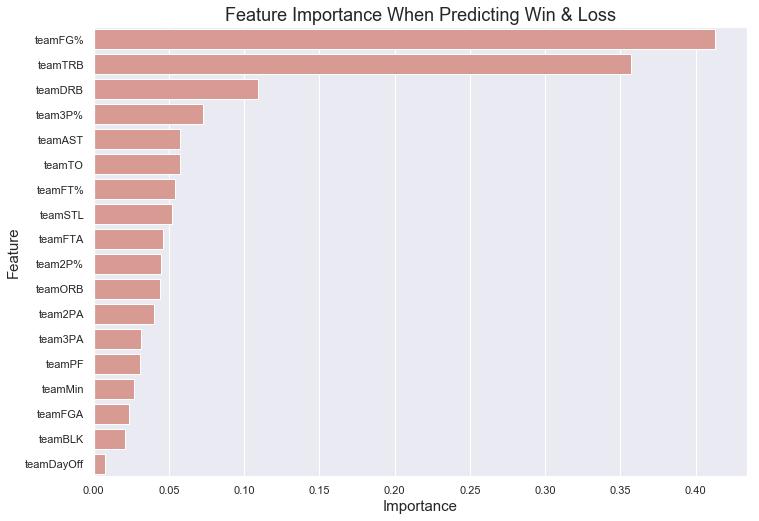

In [87]:
# Plot Feature Importance
sns.set(rc={'figure.figsize':(11.7, 8.27)})
fig, ax = plt.subplots( nrows=1, ncols=1 )  
ax= sns.barplot(x='Importance', y="Feature", data=imp_plot,color="salmon",  saturation=.5)
ax.set_title('Feature Importance When Predicting Win & Loss').set_fontsize(18)
ax.set_xlabel('Importance').set_fontsize(15)
ax.set_ylabel('Feature').set_fontsize(15)
fig.savefig('Result_Prediction_Feature_Importance')   # save the figure to file